<a href="https://colab.research.google.com/github/dsrojo10/PDS_UdeA/blob/main/Clase4_12_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase #4 12-Feb-23
### David Santiago Rojo C.

## Ejemplos del monitor

### Ejemplo 1. Desplazamiento de Señales Periodicas y Aperiodicas.

In [ ]:
# Importar las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt


Primero se va a hacer unejemplo de desplazamiento de una señal no periódica.

<ipython-input-2-1bed22a61299>:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(x1_n)), x1_n)
<ipython-input-2-1bed22a61299>:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(x1_n_despl)), x1_n_despl)


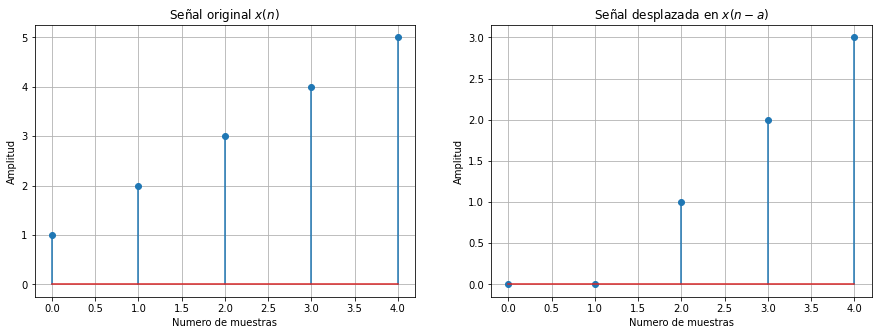

In [ ]:
def desplazar_nper(secuencia, desplazamiento):
    # Toma el desplazamiento, y, mientras el contador sea menor a ese contadorvan a haber ceros,
    # luego de eso, se usa el mismo desplazamiento para agarrar los valores que se omitieron por la
    # sentencia IF.
    secuencia_despl = []
    for i in range(len(secuencia)):
        if (i < desplazamiento):
            secuencia_despl.append(0)
        else:
            secuencia_despl.append(secuencia[i-desplazamiento])
    return secuencia_despl
x1_n = [1,2,3,4,5]                      # Señal original
x1_n_despl = desplazar_nper(x1_n, 2)    # Señal desplazada

# Graficar señales desplazada y no desplazada
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.title('Señal original $x(n)$')
plt.stem(np.arange(len(x1_n)), x1_n)
plt.grid()
plt.xlabel('Numero de muestras')
plt.ylabel('Amplitud')

plt.subplot(122)
plt.title('Señal desplazada en $x(n-a)$')
plt.stem(np.arange(len(x1_n_despl)), x1_n_despl)
plt.grid()
plt.xlabel('Numero de muestras')
plt.ylabel('Amplitud')

plt.show()

Ahora, el desplazamiento de una señal periódica

<ipython-input-3-4ebad7dfe027>:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(x2_n)), x2_n)
<ipython-input-3-4ebad7dfe027>:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(x2_n_despl)), x2_n_despl)


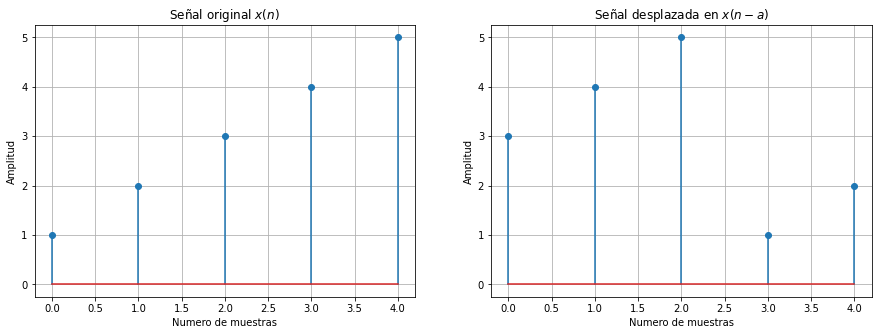

In [ ]:
def desplazar_per(secuencia, desplazamiento):
    # Mientras el contador sea menor al desplazamiento, se van a poner los ultimos valores de la
    # secuencia de primeros conservando el orden, luego se ponen los valores restantes omitidos por
    # la sentencia IF.
    secuencia_despl = []
    for i in range(len(secuencia)):
        if (i < desplazamiento):
            secuencia_despl.append(secuencia[len(secuencia)-desplazamiento+i])
        else:
            secuencia_despl.append(secuencia[i-desplazamiento])
    return secuencia_despl

x2_n = [1,2,3,4,5]                      # Señal original
x2_n_despl = desplazar_per(x1_n, 3)     # Señal desplazada

# Graficar señales desplazada y no desplazada
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.title('Señal original $x(n)$')
plt.stem(np.arange(len(x2_n)), x2_n)
plt.grid()
plt.xlabel('Numero de muestras')
plt.ylabel('Amplitud')

plt.subplot(122)
plt.title('Señal desplazada en $x(n-a)$')
plt.stem(np.arange(len(x2_n_despl)), x2_n_despl)
plt.grid()
plt.xlabel('Numero de muestras')
plt.ylabel('Amplitud')

plt.show()

### Ejemplo 2. Filtros de Media Movil.

In [ ]:
# Importar las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt

def filtro_media_movil(secuencia, puntos = 2):
    # Esta función se encarga de hacer un filtrado de media movil de N puntos, por defecto está
    # en 2 puntos, se pueden poner los puntos que desee.
    filtrado = []
    for i in range(len(secuencia)):
        aux = 0
        for j in range(puntos):
            if (i-j >= 0):
                aux += secuencia[i-j]
        filtrado.append(aux/2)
    return filtrado

Suponga la señal $x(n)=\delta(n)$. Se quiere pasar a través de un filtro de media movil de 2 puntos.

In [ ]:
N = 9                                           # Numero de muestras
n = np.arange(-N//2+1, N//2+1)                  # Vector de muestras
delta = np.zeros(N)                             # vector de ceros
delta[N//2] = 1                                 # Señal escalón
delta_filtrado = filtro_media_movil(delta)      # Señal filtrada

<ipython-input-7-c6d1ebac12ef>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, delta)
<ipython-input-7-c6d1ebac12ef>:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, delta_filtrado)


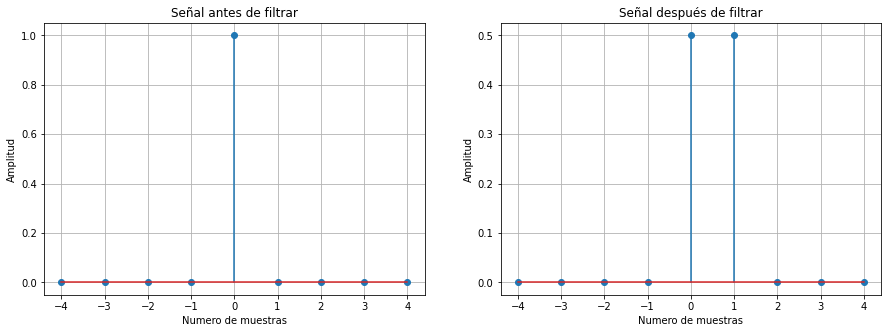

In [ ]:
# Grafica de la señal antes y despues
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.title('Señal antes de filtrar')
plt.stem(n, delta)
plt.grid()
plt.xlabel('Numero de muestras')
plt.ylabel('Amplitud')

plt.subplot(122)
plt.title('Señal después de filtrar')
plt.stem(n, delta_filtrado)
plt.grid()
plt.xlabel('Numero de muestras')
plt.ylabel('Amplitud')

plt.show()

Otro ejemplo pero ahora con la función $x(n)=cos(πn)$

<ipython-input-8-6d159eaf451b>:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, x)
<ipython-input-8-6d159eaf451b>:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, x_filtrado)


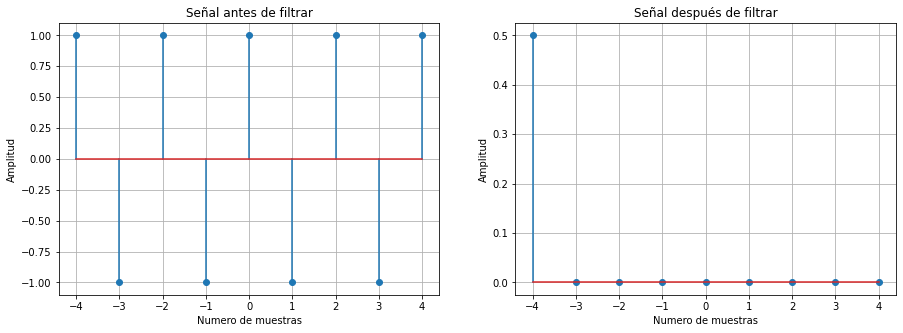

In [ ]:
N = 9                                   # Numero de muestras
x = np.cos(np.pi*n)                     # vector de ceros
x_filtrado = filtro_media_movil(x)      # Señal filtrada

# Grafica de la señal antes y despues
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.title('Señal antes de filtrar')
plt.stem(n, x)
plt.grid()
plt.xlabel('Numero de muestras')
plt.ylabel('Amplitud')

plt.subplot(122)
plt.title('Señal después de filtrar')
plt.stem(n, x_filtrado)
plt.grid()
plt.xlabel('Numero de muestras')
plt.ylabel('Amplitud')

plt.show()

La señal filtrada de la función anterior muestra un valor de 0.5 en la posición -4 debido a que se hizo con una señal finita, como antes de esta no hay nada se asume que es cero y da como resultado 0.5 al pasar por el filtro. Si se asume la señal infinita (esto no es posible representarlo en un computador), este valor no estaría, todo seria cero ya que todo se cancelaría hasta el infinito.

## Ejemplo mio:

### Ejemplo 1: Desplazamiento

En el ejemplo del monitor se mostro a traves de dos funciones creadas, como se podian desplazar señales periodicas y aperiodicas, en este caso se presenta como se pueden desplazar las señales directamente con la libreria numpy, especificamente con la función ***roll(x,n)*** la cual recibe **(x $\rightarrow$ señal a desplazar, n $\rightarrow$ factor de desplazamiento)**

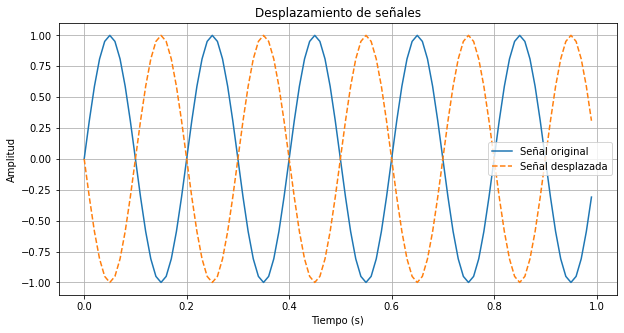

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la señal periódica
fs = 100  # Frecuencia de muestreo
t = np.arange(0, 1, 1/fs)  # Vector de tiempo
f = 5  # Frecuencia de la señal
x = np.sin(2*np.pi*f*t)  # Señal original

# Desplazar la señal
a = 0.3  # Factor de desplazamiento
n = int(a*fs)  # Número de muestras a desplazar
x_despl = np.roll(x, n)  # Desplazar la señal

# Graficar señales
plt.figure(figsize=(10, 5))
plt.title("Desplazamiento de señales")
plt.plot(t, x, label='Señal original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.plot(t, x_despl, '--', label='Señal desplazada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.show()